## Observations and Insights 

In [125]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID",how="left")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [32]:
# Checking the number of mice.
mouse_count = merged_df["Mouse ID"].count()
mouse_count


1893

In [33]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [34]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_rows = merged_df[merged_df.duplicated(['Mouse ID',])]
all_duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [36]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

newthing = merged_df.groupby('Drug Regimen')
first = newthing.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
first


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

means = merged_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = merged_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = merged_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standards = merged_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = merged_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

newtable = pd.DataFrame(means)
newtable2 = newtable.rename(columns={"Tumor Volume (mm3)": "Mean"})

newtable2["Median"] = medians
newtable2["Variance"] = variances
newtable2["std"] = standards
newtable2["sem"] = sems

newtable2

,Mean,Median,Variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

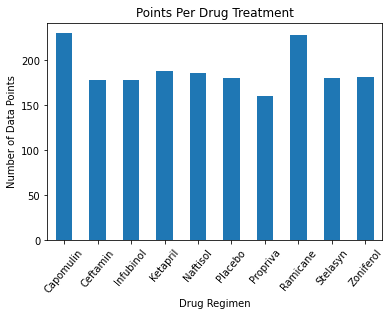

In [39]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

datapts2 = merged_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
forpanbar = pd.DataFrame(datapts2)
#newtry = forpanbar.reset_index()
#newtry

also = forpanbar.plot.bar(legend=False,rot=50)
also
plt.ylabel("Number of Data Points")
plt.title("Points Per Drug Treatment")
plt.savefig('barplot1')


In [123]:
forpanbar.head()

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186


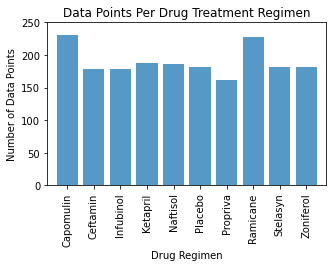

In [126]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = np.arange(len(datapts2))

tick_locations = [x for x in x_axis]
#for x in x_axis:
#tick_locations.append(x)

plt.figure(figsize=(5,3))
#plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="center")
#plt.xticks(tick_locations, rain_df["State"], rotation="vertical")

newtry = forpanbar.reset_index()
newtry

plt.bar(x_axis, forpanbar['Tumor Volume (mm3)'], alpha=0.75, align="center")
plt.xticks(tick_locations, newtry['Drug Regimen'],rotation="vertical")

plt.xlim(-0.75, len(datapts2)-.25)
plt.ylim(0, 250)

plt.title("Data Points Per Drug Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.savefig('barplot2')
plt.show()

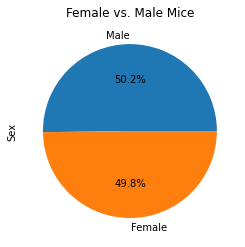

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

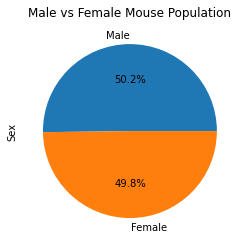

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [86]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  


The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


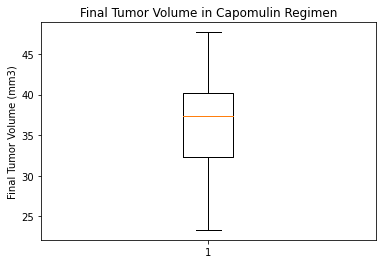

In [81]:
# Capomulin
merged_df.head() 

sorted_df = merged_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
last_df.head().reset_index()

capo_df = last_df[last_df["Drug Regimen"].isin(["Capomulin"])]
capo_df.head().reset_index()

capo_obj = capo_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capo_obj = capo_obj["Tumor Volume (mm3)"]
capo_obj

quartiles = capo_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Capomulin Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(capo_obj)
plt.show()


The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


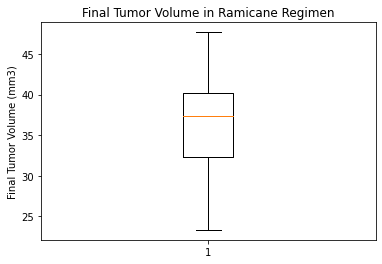

In [65]:
#Ramicane
ram_df = last_df[last_df["Drug Regimen"].isin(["Ramicane"])]
ram_df.head().reset_index()

ram_obj = ram_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_obj = ram_obj["Tumor Volume (mm3)"]
ram_obj

quartiles = capo_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Ramicane Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(capo_obj)
plt.show()


The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


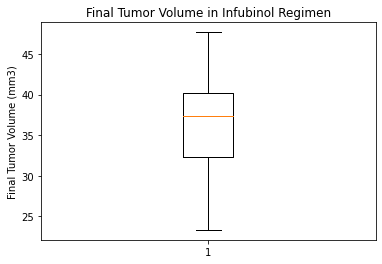

In [70]:
#Infubinol
infu_df = last_df[last_df["Drug Regimen"].isin(["Infubinol"])]
infu_df.head().reset_index()

infu_obj = infu_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infu_obj = infu_obj["Tumor Volume (mm3)"]
infu_obj

quartiles = capo_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Infubinol Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(capo_obj)
plt.show()

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


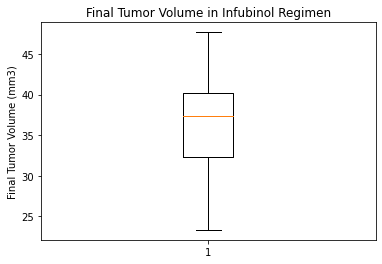

In [72]:
#Ceftamin
ceft_df = last_df[last_df["Drug Regimen"].isin(["Ceftamin"])]
ceft_df.head().reset_index()

ceft_obj = ceft_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceft_obj = ceft_obj["Tumor Volume (mm3)"]
ceft_obj

quartiles = capo_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Infubinol Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(capo_obj)
plt.show()

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

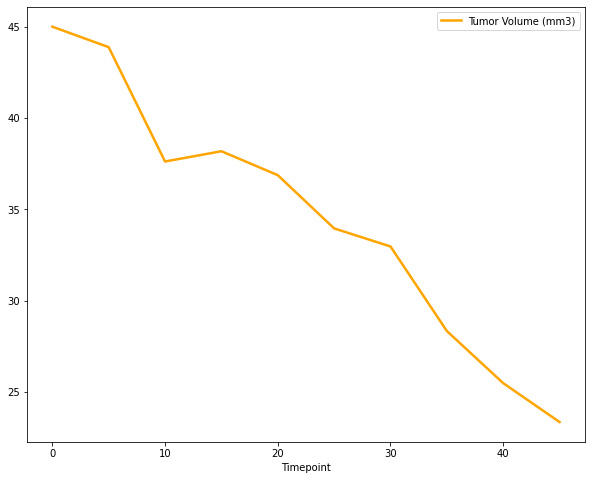

In [102]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

capo_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capo_mouse

capo_mouse = capo_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

capo_mouse = capo_mouse.reset_index(drop=True)
capo_mouse.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="orange")

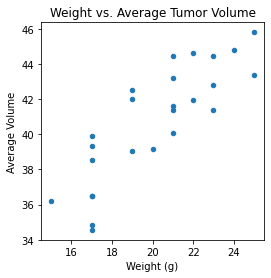

In [116]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df.head() 

weight_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_df.head()

avg_capo = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_capo.head()

avg_capo = avg_capo.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_capo.head()

avg_capo.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=False, figsize=(4,4), title="Weight vs. Average Tumor Volume")
plt.show()

In [120]:
plt.clf()
plt.cla()
plt.close()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = avg_capo.iloc[:,0]
avg_tumor_volume = avg_capo.iloc[:,1]

# We then compute the Pearson correlation coefficient between "Mouse Weight" and "Average Tumor Volume"
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# import linregress
from scipy.stats import linregress

# Add the lineear regression equation and line to the scatter plot
x_values = avg_capo["Weight (g)"]
y_values = avg_capo["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()